In [7]:
%pylab inline
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
dataq1 = pd.read_csv('2017Q1-capitalbikeshare-tripdata.csv')
dataq2 = pd.read_csv('2017Q2-capitalbikeshare-tripdata.csv')
dataq3 = pd.read_csv('2017Q3-capitalbikeshare-tripdata.csv')
dataq4 = pd.read_csv('2017Q4-capitalbikeshare-tripdata.csv')

#data.plot(kind = 'bar')
#plt.legend(loc='upper left')
#plt.show()

Populating the interactive namespace from numpy and matplotlib


In [8]:
data = pd.concat([dataq1, dataq2, dataq3, dataq4], ignore_index=True)
mapping2 = {"Monday": 1, "Tuesday":2, "Wednesday":3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
data['Day'] = data['Day'].replace(mapping2).astype(np.int)

# The Dataset


In [64]:
data

,Duration,Startdate,Hour,Enddate,Day,Season,Startstationnumber,Startstation,Endstationnumber,Endstation,Bikenumber,Membertype
0,221,1/1/2017 0:00,0,1/1/2017 0:04,7,Spring,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,1/1/2017 0:06,0,1/1/2017 0:34,7,Spring,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,1/1/2017 0:07,0,1/1/2017 0:29,7,Spring,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,1/1/2017 0:07,0,1/1/2017 0:29,7,Spring,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,1/1/2017 0:07,0,1/1/2017 0:34,7,Spring,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual
...,...,...,...,...,...,...,...,...,...,...,...,...
3558919,277,12/31/2017 23:43,23,12/31/2017 23:47,7,Winter,31109,7th & T St NW,31118,3rd & Elm St NW,W21036,Member
3558920,399,12/31/2017 23:51,23,12/31/2017 23:58,7,Winter,31125,15th & W St NW,31110,20th St & Florida Ave NW,W23147,Casual
3558921,393,12/31/2017 23:55,23,1/1/2018 0:01,7,Winter,31209,1st & N St SE,31609,Maine Ave & 7th St SW,W20144,Member
3558922,1319,12/31/2017 23:57,23,1/1/2018 0:19,7,Winter,31102,11th & Kenyon St NW,31102,11th & Kenyon St NW,W20860,Member


In [10]:
def count_rows(rows):
    return len(rows)
d = data.groupby('Day Membertype'.split()).apply(count_rows)
d

Day  Membertype
1    Casual        113463
     Member        391166
2    Casual         96785
     Member        427741
3    Casual         91063
     Member        444950
4    Casual         91850
     Member        418058
5    Casual        114179
     Member        384535
6    Casual        214800
     Member        279440
7    Casual        210819
     Member        280075
dtype: int64

In [65]:
h = data.groupby('Hour Day'.split()).apply(count_rows).unstack()

h

Day,1,2,3,4,5,6,7
Hour,,,,,,,
0,2642,2419,2408,2506,3359,6330,7329
1,1203,948,982,1046,1973,4114,5387
2,665,578,604,608,1048,2847,3550
3,333,264,284,293,354,1376,1901
4,555,652,603,597,636,608,706
5,3652,4462,4811,3989,3546,953,864
6,12557,16568,16554,14611,12113,2433,2376
7,30577,40849,41429,37429,30594,6524,5053
8,43905,55552,58248,53072,49654,13823,11590


Text(0.5, 1, 'Number of trips by day & Hour')

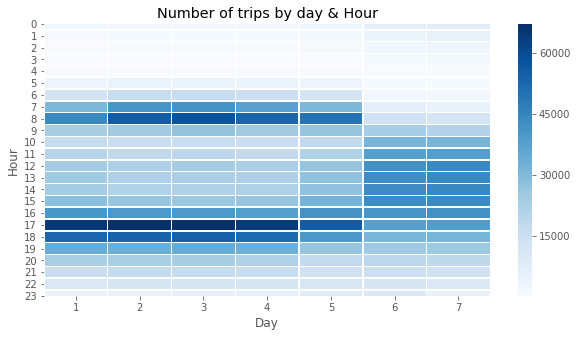

In [104]:
plt.figure(figsize=(10,5))
seaborn.heatmap(h,cmap="Blues",linewidth = 0.4)
plt.title('Number of trips by day & Hour')


Text(0.5, 1.0, 'Number of trips by day')

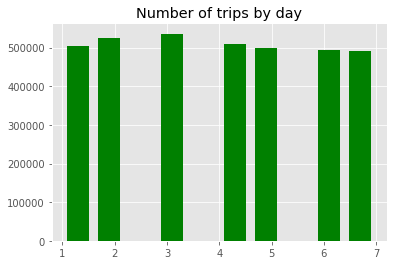

In [88]:
hist(data.Day,rwidth = .7,color = 'Green',align='mid')
plt.title('Number of trips by day')

In [96]:
df = pd.DataFrame(data)
df.head()
#mapping3 = {"Member": 1, "Casual":0}
#df['Membertype'] = df['Membertype'].replace(mapping3).astype(np.float64)
#df1 = pd.DataFrame(df.groupby(['Day']).count()['Duration']).reset_index()
df1 = pd.DataFrame(df.groupby(['Hour']).count()['Duration']).reset_index()
df1
#mapping2 = {"Monday": 1, "Tuesday":2, "Wednesday":3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
#df1['Day'] = df1['Day'].replace(mapping2).astype(np.float64)
df3 = df1.rename(columns = {'Duration':'RiderCount'})
df3


,Hour,RiderCount
0,0,26993
1,1,15653
2,2,9900
3,3,4805
4,4,4357
5,5,22277
6,6,77212
7,7,192455
8,8,285844
9,9,171942


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
Hour          168 non-null int64
Day           168 non-null float64
RiderCount    168 non-null int64
dtypes: float64(1), int64(2)
memory usage: 4.1 KB


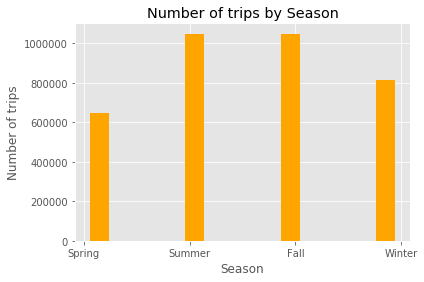

In [93]:
  
    plt.hist(data['Season'].astype(str), rwidth=.6, align='mid', color='orange', label='Histogram for days of the week')
    plt.xlabel('Season')
    plt.ylabel('Number of trips')
    plt.title('Number of trips by Season')
    plt.show()


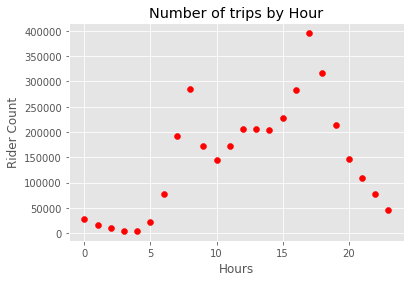

In [97]:
df3
plt.scatter(df3.Hour, df3.RiderCount,c='red', label='Scatter Plot')
plt.xlabel('Hours')
plt.ylabel('Rider Count')
plt.title('Number of trips by Hour')
plt.show()

In [98]:
df = pd.DataFrame(data)
df.head()
df1 = pd.DataFrame(df.groupby(['Day']).count()['Duration']).reset_index()
df1
df4 = df1.rename(columns = {'Duration':'RiderCount'})
df4

,Day,RiderCount
0,1,504629
1,2,524526
2,3,536013
3,4,509908
4,5,498714
5,6,494240
6,7,490894


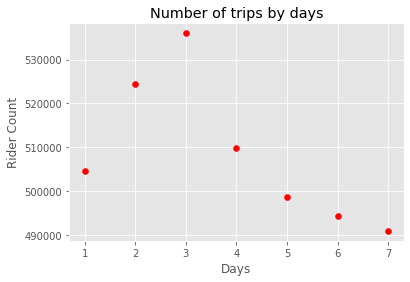

In [106]:
df4
plt.scatter(df4.Day, df4.RiderCount,c='red', label='Scatter Plot')
plt.xlabel('Days')
plt.ylabel('Rider Count')
plt.title('Number of trips by days')
plt.show()

In [77]:
st = data.groupby('Startstationnumber')['Startstationnumber'].apply(count_rows)
st
st3 = st.sort_values(ascending = False)
st3
#plt.figure(figsize=())
#st.columns = ['station','count']
#st1 = st.head(10)
#st2 = pandas.DataFrame(st1, columns = ['col2'])
#st2['col2']

Startstation
Columbus Circle / Union Station         13712
Massachusetts Ave & Dupont Circle NW     9071
15th & P St NW                           8195
Jefferson Dr & 14th St SW                8026
Lincoln Memorial                         7876
                                        ...  
Taft St & E Gude Dr                         9
Traville Gateway Dr & Gudelsky Dr           7
Broschart & Blackwell Rd                    3
Reston Regional Library                     3
Deanwood Rec Center                         3
Name: Startstationnumber, Length: 452, dtype: int64

In [62]:
#list(st1)

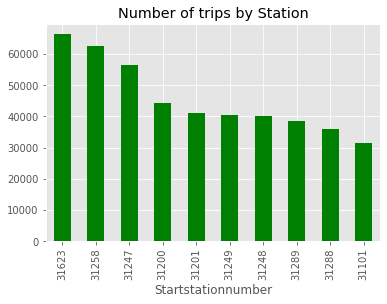

In [102]:
plt.clf()
data.groupby('Startstationnumber').size().sort_values(ascending = False).head(10).plot(kind = 'bar',color = 'Green')
plt.title('Number of trips by Station')
plt.show()

In [13]:

mapping2 = {"Monday": 1, "Tuesday":2, "Wednesday":3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
dataq1['Day'] = dataq1['Day'].replace(mapping2).astype(np.int)

In [1]:
m = dataq1.groupby('Day Membertype'.split()).apply(count_rows).unstack()
m


NameError: name 'dataq1' is not defined

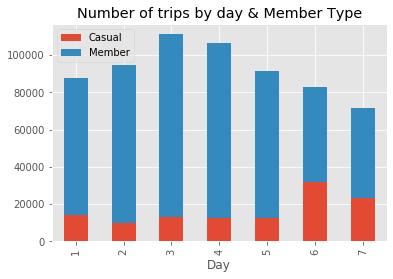

In [15]:
m.plot(kind = 'bar', stacked= True)
plt.legend(loc='upper left')
plt.title('Number of trips by day & Member Type')
plt.show()